### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import datasets
from sklearn import linear_model 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### SINCE SPECIES IS AN OBJECT THEREFORE CONVERTING USING LABEL ENCODER

In [3]:
le=LabelEncoder()
data['species']= le.fit_transform(data['species'].astype('str'))
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


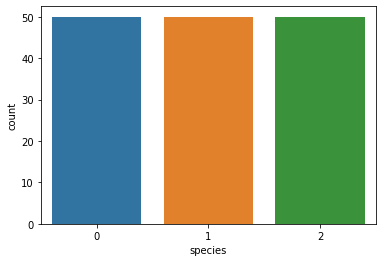

In [5]:
sb.countplot(x = "species", data = data);

In [9]:
count = data.count()
print(count)

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64


In [10]:
x=data.drop("species",axis=1)
y=data['species']

In [11]:
data.isnull().sum().any()

False

### SPLITTING THE DATA

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


### LOGISTIC REGRESSION

In [14]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
yhat = model.predict(x_test)

### ACCURACY OF LOGISTIC REGRESSION

In [28]:
accuracy_lr = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy_lr*100))

Accuracy: 88.89


### K NEAREST NEIGHBORS

In [17]:
knn = KNeighborsClassifier(n_neighbors=2)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [19]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(n_neighbors=2)

In [20]:
pr=knn.predict(x_test)
pr

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

### ACCURACY OF KNN

In [35]:
accuracy_knn = metrics.accuracy_score(y_test, pr)
print("KNN model accuracy(in %):",accuracy_knn*100)  


KNN model accuracy(in %): 97.77777777777777


In [23]:
new = np.array([[5.1,3.2,5.1,1.5]])
knn.predict(new)

array([2])

In [22]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### NAIVE BAYES

In [23]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [24]:
train_prediction = model.predict(x_train)
train_prediction

array([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0])

### ACCURACY OF NAIVE BAYES

In [32]:
accuracy_gnb = metrics.accuracy_score(y_train, train_prediction)
print("Model Accuracy:",accuracy_gnb)

Model Accuracy: 0.9523809523809523


In [44]:
print("Accuracy of Logistic Regression = ",accuracy_lr*100)
print("Accuracy of Gausian Naive Bayes = ",accuracy_gnb*100)
print("Accuracy of K Nearest Neighbor = ",accuracy_knn*100)

Accuracy of Logistic Regression =  88.88888888888889
Accuracy of Gausian Naive Bayes =  95.23809523809523
Accuracy of K Nearest Neighbor =  97.77777777777777
